# 1.4 Supervised Learning Algorithms Part 1

## Contents:

1. Import Libraries
2. Import Datasets
3. K-Nearest Neighbours for Unscaled Data
4. K-Nearest Neighbours for Scaled Data

# 1. Import Libraries

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

## 2. Import Datasets

In [273]:
# define path to dataset

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/Data Sets/'

# import dataset

df = pd.read_csv(os.path.join(path, 'temperature.csv'))
df_scaled = pd.read_csv(os.path.join(path, 'temperature_scaled.csv'))
df_pleasant = pd.read_csv(os.path.join(path, 'pleasant_weather.csv'))

## 3. K-Nearest Neighbours for Unscaled Data

In [275]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [276]:
# drop columns that are not in answers dataset

df_dropped = df.drop(df.columns[df.columns.str.contains('GDANSK|ROMA|TOURS|Unnamed: 0', regex=True)], axis=1)

# keep columns with for mean temperature

df_dropped = df_dropped.filter(regex='_temp_mean$', axis=1)

In [277]:
# create an 'X' matrix by dropping the unneeded columns

X = df_dropped
y = df_pleasant.drop(['DATE'], axis=1)

In [278]:
# check shape of X and y

print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [279]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [280]:
# print the shapes of the training and testing sets for verification

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [281]:
# run the model with neighbors equal to 1 to 4, test the accuracy

k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

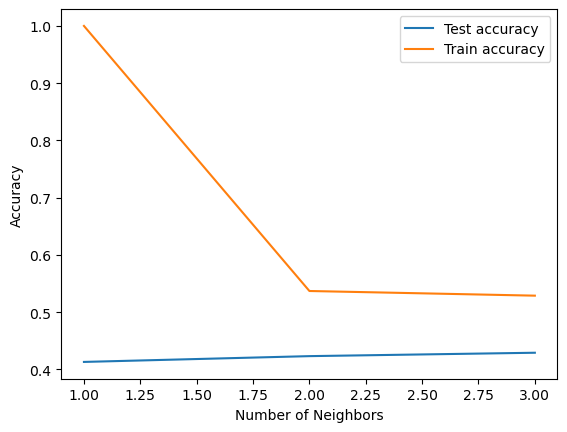

In [282]:
# plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [283]:
# confusion matrix based on the last "k" in the sequence

locations = list({x.split("_")[0] for x in df_dropped.columns})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


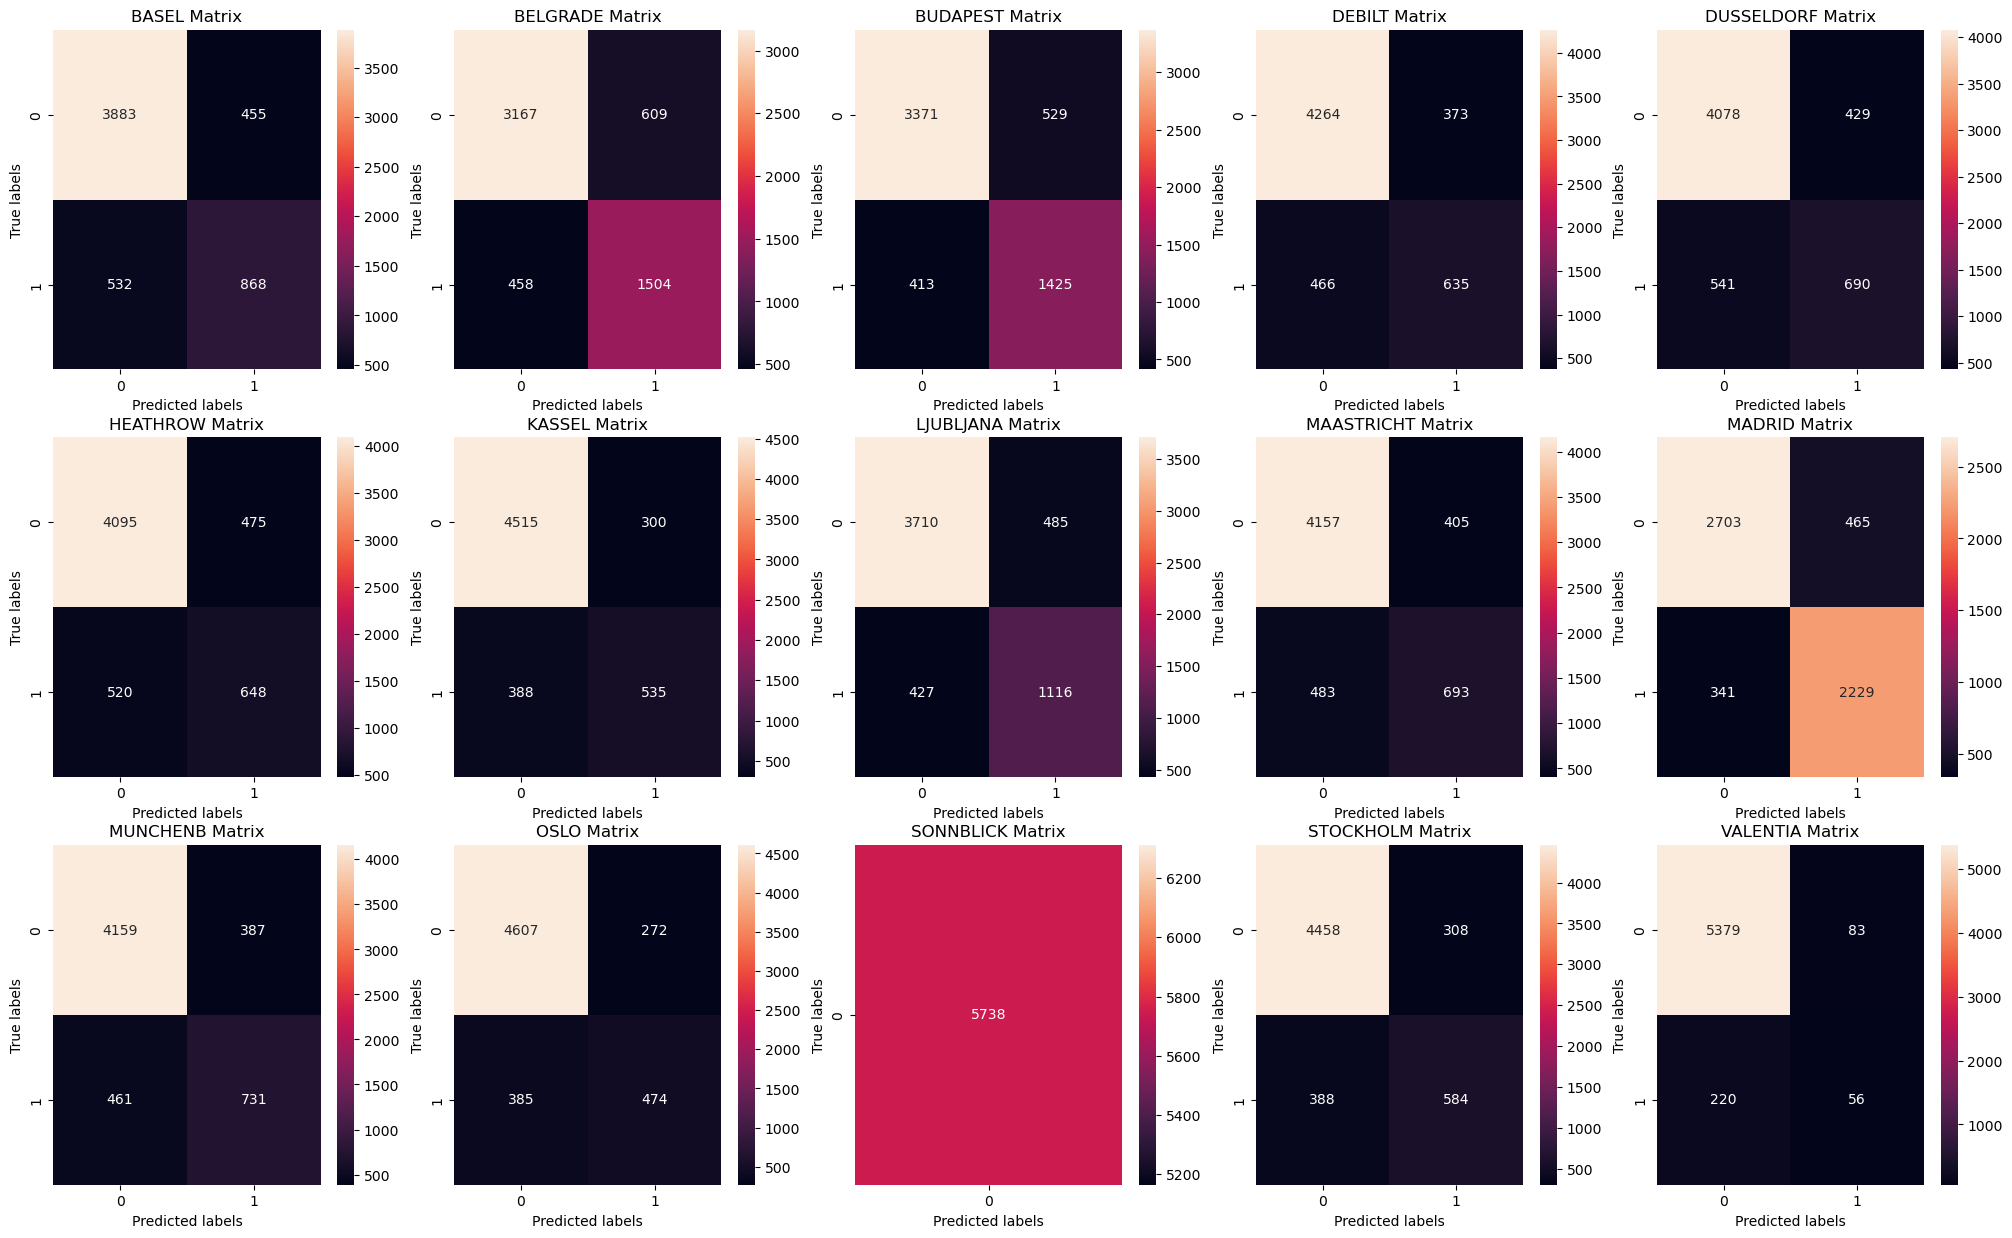

In [284]:
# create a grid of confusion matrices to visualise the classification performance for predicting "pleasant" or "unpleasant" weather at different locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


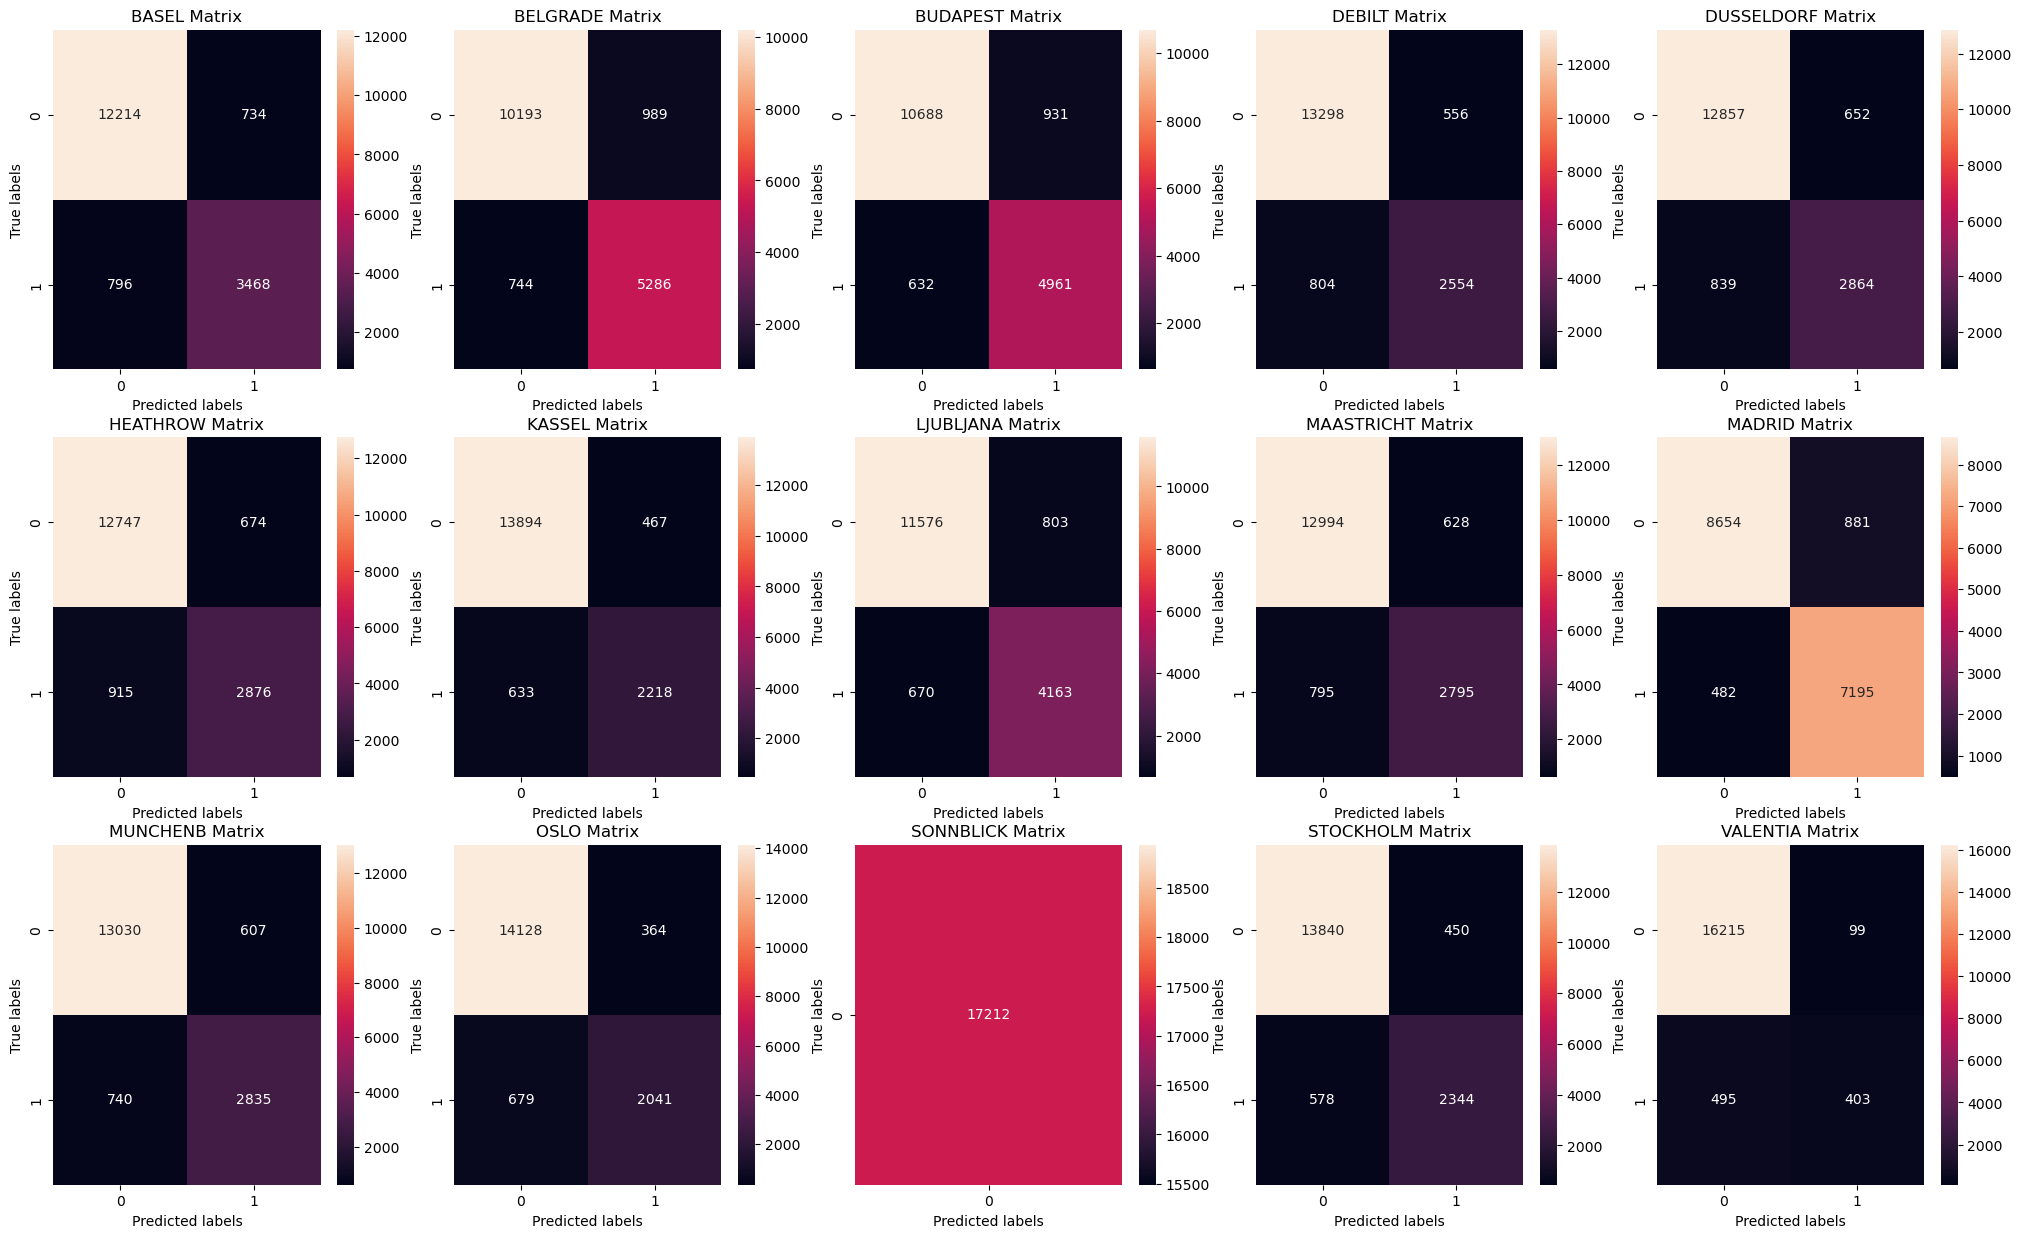

In [285]:
# create a grid of confusion matrices to visualise the classification performance for predicting "pleasant" or "unpleasant" weather at different locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## 4. K-Nearest Neighbours for Scaled Data

In [287]:
df_scaled.head()

,Unnamed: 0,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [288]:
# drop columns that are not in answers dataset

df_scaled_dropped = df_scaled.drop(df_scaled.columns[df_scaled.columns.str.contains('GDANSK|ROMA|TOURS|Unnamed: 0', regex=True)], axis=1)

# keep columns with for mean temperature

df_scaled_dropped = df_scaled_dropped.filter(regex='_temp_mean$', axis=1)

In [289]:
# create an 'X' matrix by dropping the unneeded columns

X = df_scaled_dropped
y = df_pleasant.drop(['DATE'], axis=1)

In [290]:
# check shape of X and y

print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [291]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [292]:
# print the shapes of the training and testing sets for verification

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [293]:
# run the model with neighbors equal to 1 to 4, test the accuracy

k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

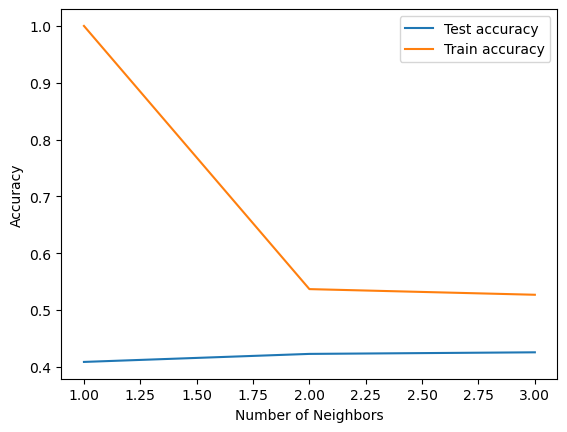

In [294]:
# plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [295]:
# confusion matrix based on the last "k" in the sequence

locations = list({x.split("_")[0] for x in df_scaled_dropped.columns})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


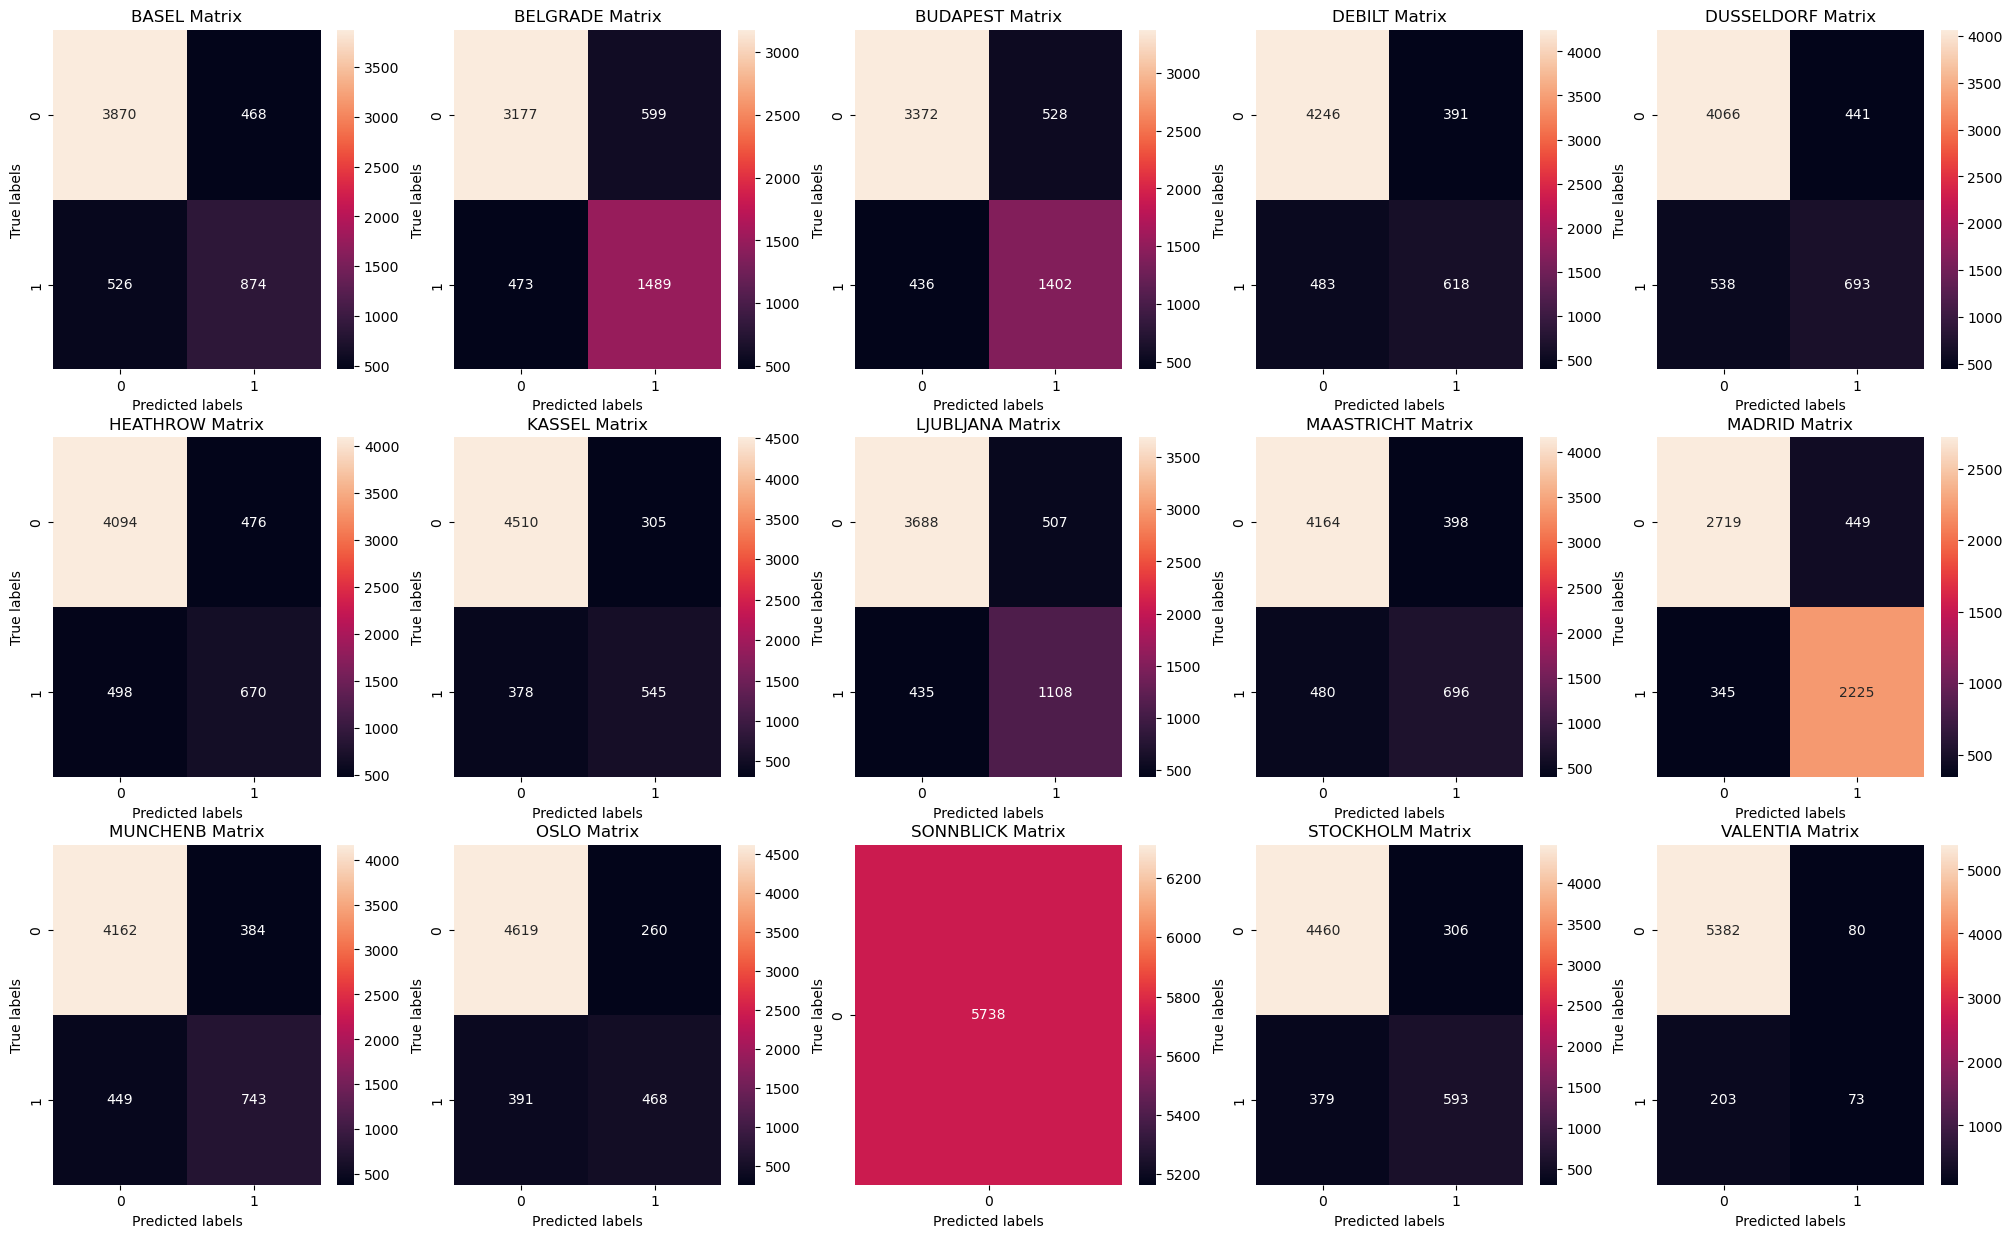

In [296]:
# create a grid of confusion matrices to visualise the classification performance for predicting "pleasant" or "unpleasant" weather at different locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


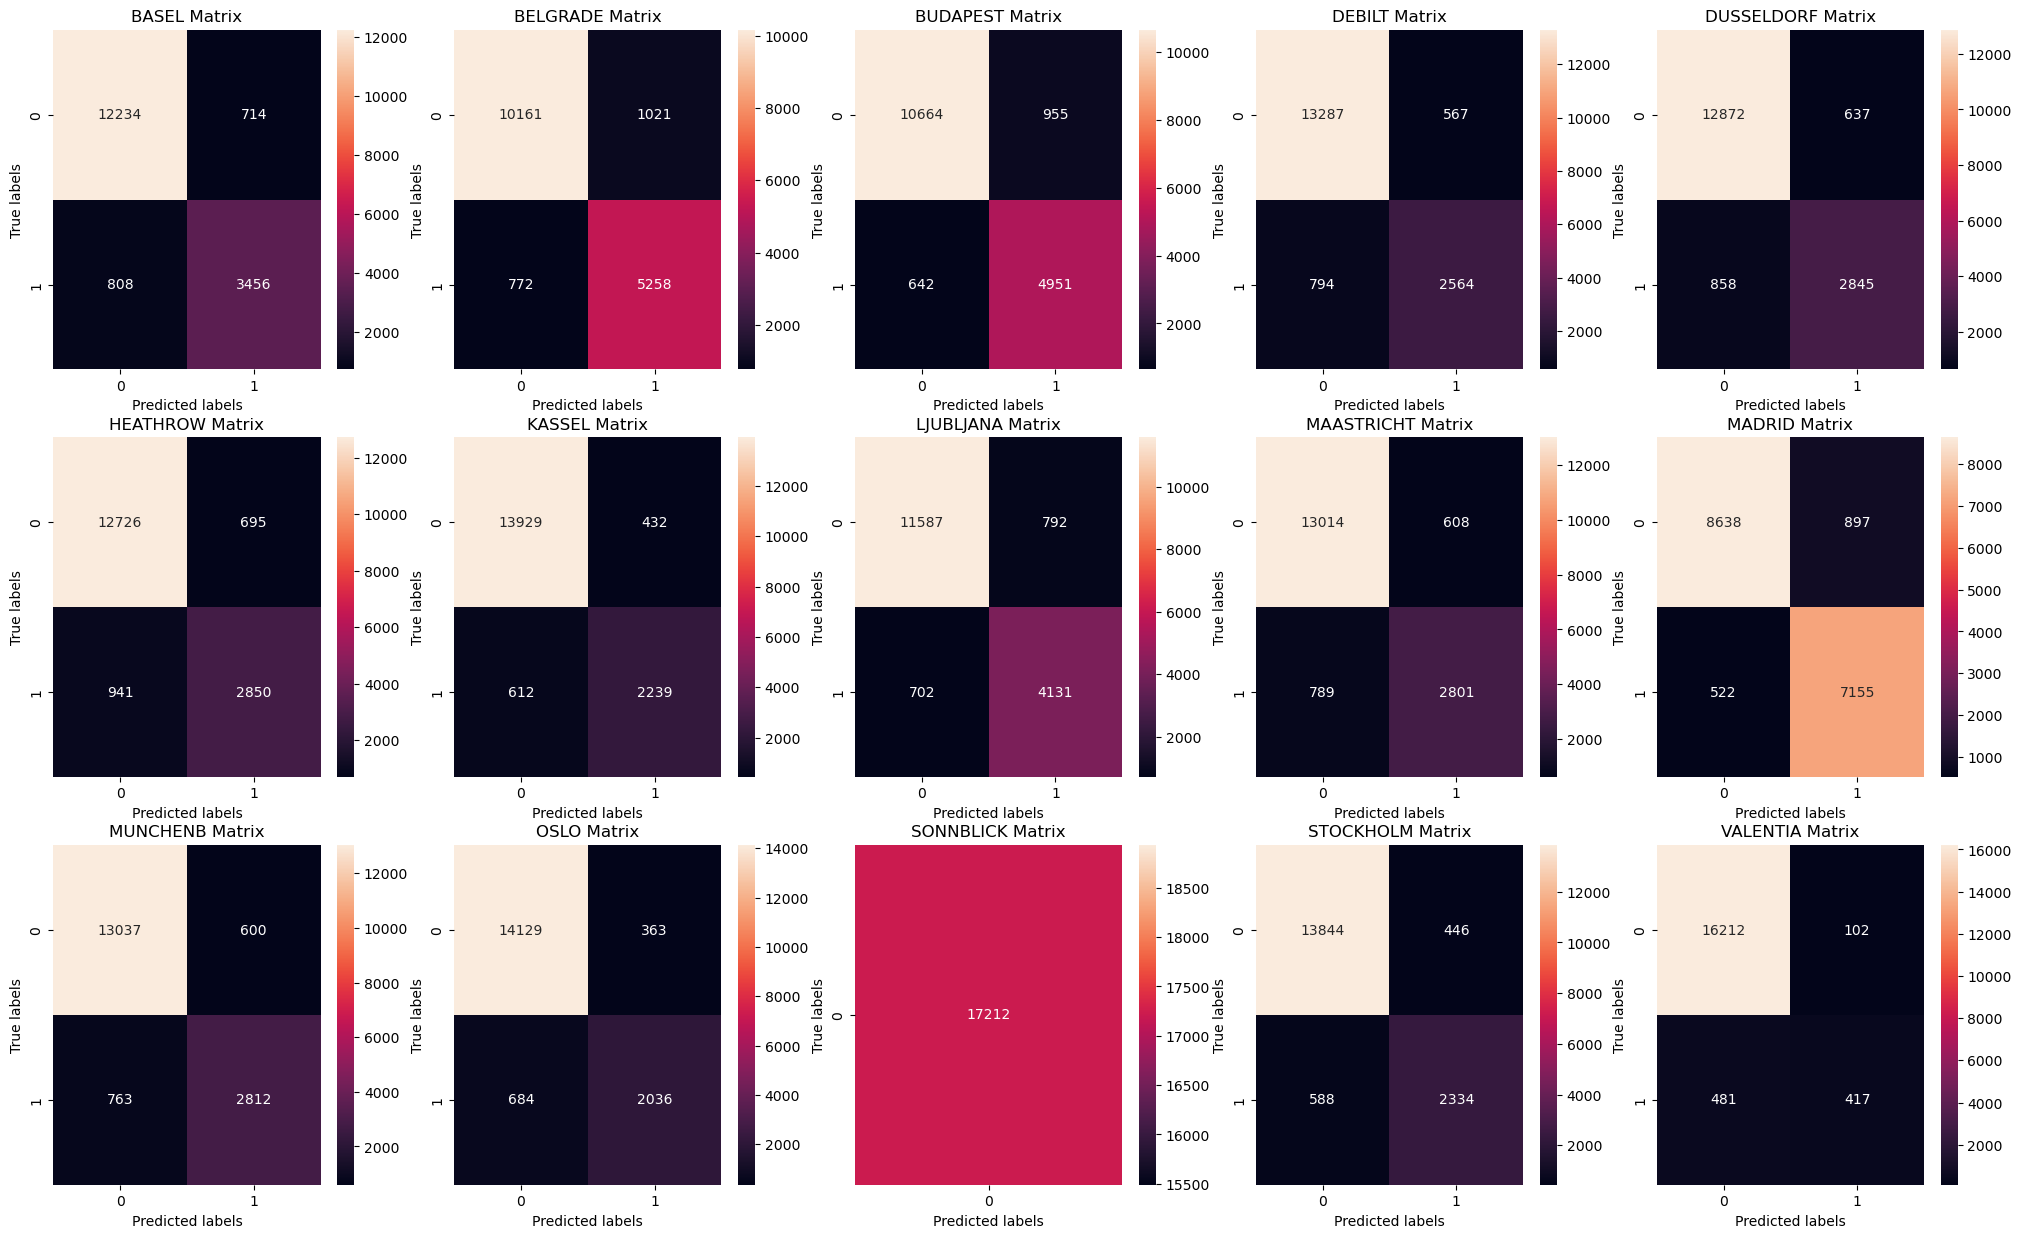

In [297]:
# create a grid of confusion matrices to visualise the classification performance for predicting "pleasant" or "unpleasant" weather at different locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1